In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from juart.ellipsoid_phantoms.coils import Coil, CoilLoop

# Get coil sensitivities of a single coil loop

In [2]:
r_center = [0.09, 0, 0]
normal = [1, 0, 0]
radius = 0.03
num_straight_sections = 50

fov = [0.2, 0.2, 0.2]
matrix = [64, 64, 64]
x, y, z = [np.linspace(-fov[i] / 2, fov[i] / 2, matrix[i]) for i in range(3)]
grid = np.meshgrid(x, y, z, indexing="ij")

r_3d = np.stack([grid[0].flatten(), grid[1].flatten(), grid[2].flatten()], axis=0)

## Create a single coil loop

In [3]:
coil_loop = CoilLoop(r_center, normal, radius, num_straight_sections)

## Estimate coil sensitivities of the coil loop

In [4]:
coil_sens = coil_loop.get_sensitivity(r_3d)

# Reshape r_3d back to the grid
r_3d_reshaped = [r_3d[i].reshape(matrix) for i in range(3)]

# Reshape coil_sens to the right grid locations
coil_sens_reshaped = coil_sens.reshape(matrix)

interactive(children=(IntSlider(value=31, description='w', max=63), Output()), _dom_classes=('widget-interact'…

<function __main__.update(w)>

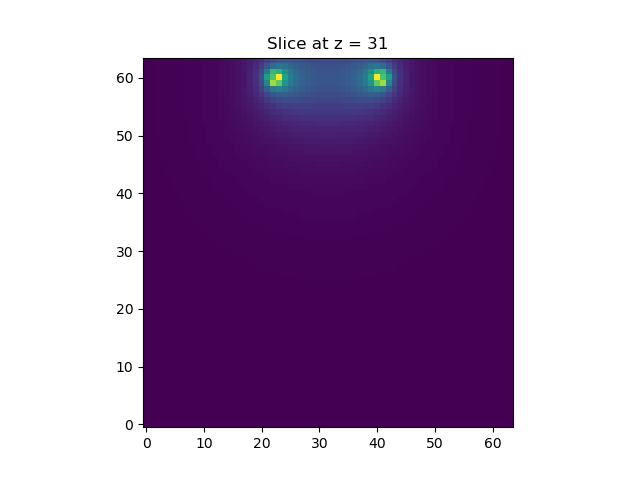

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
z0 = matrix[2] // 2
shw = ax.imshow(np.abs(coil_sens_reshaped[..., z0]), origin="lower")


def update(w):
    shw.set_data(np.abs(coil_sens_reshaped[..., w]))
    ax.set_title(f"Slice at z = {w}")
    fig.canvas.draw()


interact(update, w=(0, matrix[2] - 1, 1), value=z0)

# Create a coil with mulitple channels

In [6]:
coil = Coil(
    coil_radius=0.09,
    loop_radius=0.03,
    num_loops_ring=4,
    z_pos=[0.05, -0.05],
)

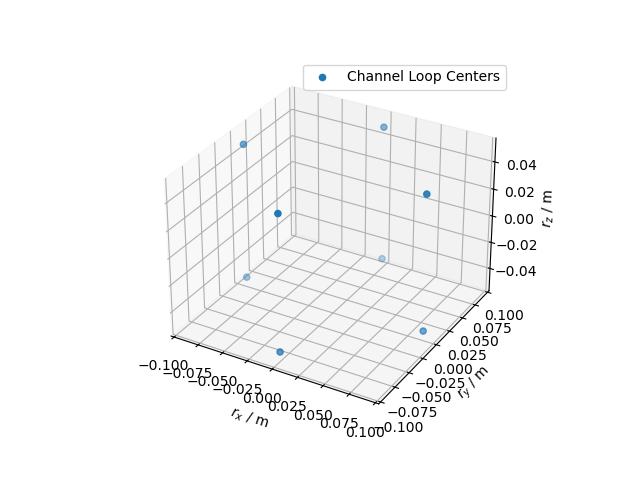

In [7]:
channel_pos = coil.coil_channel_positions

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(channel_pos[:, 0], channel_pos[:, 1], channel_pos[:, 2])
ax.set_xlabel("$r_x$ / m")
ax.set_ylabel("$r_y$ / m")
ax.set_zlabel("$r_z$ / m")
ax.legend(["Channel Loop Centers"])
plt.show()

## Simulate coil sensitivity maps for whole coil

In [ ]:
coil_sens = coil.get_sens_maps(matrix, fov, verbose=1)

# Normalize coil sensitivity maps
for n_cha in range(coil_sens.shape[0]):
    coil_sens[n_cha] /= np.max(np.abs(coil_sens[n_cha, ...]))

coil_sens_sum = np.sum(np.abs(coil_sens), axis=0)

Simulated coil sensitivities for 8 channels in 1.7457s


interactive(children=(IntSlider(value=31, description='z', max=63), Output()), _dom_classes=('widget-interact'…

<function __main__.update(z)>

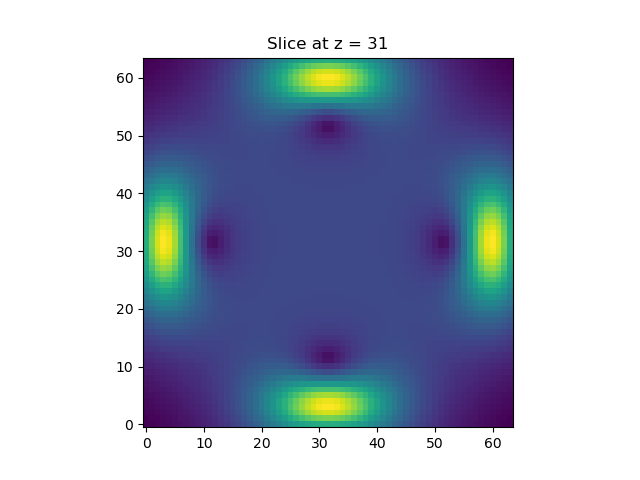

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
z0 = matrix[2] // 2

shw = ax.imshow(
    (coil_sens_sum[..., z0]),
    origin="lower",
)


def update(z):
    shw.set_data((coil_sens_sum[..., z]))
    ax.set_title(f"Slice at z = {z}")
    fig.canvas.draw()


interact(update, z=(0, matrix[2] - 1, 1), value=z0)